ZyBooks Module 8.1 
- One-way analysis of variance (one-way ANOVA)

In [7]:
# import statements
try:
    import traceback
    import scipy.stats as st 
    from scipy.stats import chi2_contingency
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.api as smf # type: ignore

    from statsmodels.formula.api import ols # type: ignore
    from IPython.display import HTML

    # imports successful print statement
    print(f'Imports Successful\n'
          f' Scipy: {st}\n'
          f' Pandas: {pd}\n'
          f' Numpy: {np}\n'
          f' Seaborn: {sns}\n'
          f' Matplotlib: {plt}\n'
          f' Statsmodels: {smf} & {ols}\n'
          f' IPython: {HTML}')

except Exception as e:
    print(f'Error type: {type(e).__name__}')
    print(f'Error: {str(e)}')
    traceback.print_exc()

Imports Successful
 Scipy: <module 'scipy.stats' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
 Pandas: <module 'pandas' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>
 Numpy: <module 'numpy' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>
 Seaborn: <module 'seaborn' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>
 Matplotlib: <module 'matplotlib.pyplot' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>
 Statsmodels: <module 'statsmodels.api' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\statsmodels\\api.py'> & <bound method Model.from_formula of <class 'statsmodels.regression.linear_model.OLS'>>
 IPython: <class 'IPython.core.display.HTML'>


In [2]:
# generate dummy data (csv download from module not available)

# declare variables 
num_exams = 4
num_students = 50
score_min = 20
score_max = 100

# declare variable to generate dummy data
exam_scores = np.random.randint(score_min, score_max + 1, size = (num_students, num_exams))

# column labels
exam_labels = [f'exam{i + 1}' for i in range(num_exams)]

df = pd.DataFrame(exam_scores, columns = exam_labels)
print(display(HTML(df.head(15).to_html(index = True))))

,exam1,exam2,exam3,exam4
0,96,82,95,50
1,61,30,47,45
2,98,58,60,65
3,32,62,78,48
4,50,39,51,41
5,46,87,57,53
6,48,75,33,53
7,99,26,79,65
8,20,72,71,48
9,87,49,38,69


None


In [3]:
# stats for each exam
exam1_score = df['exam1']
exam2_score = df['exam2']
exam3_score = df['exam3']
exam4_score = df['exam4']

print(st.f_oneway(exam1_score, exam2_score, exam3_score, exam4_score))

F_onewayResult(statistic=1.161440138930034, pvalue=0.3256596121332867)


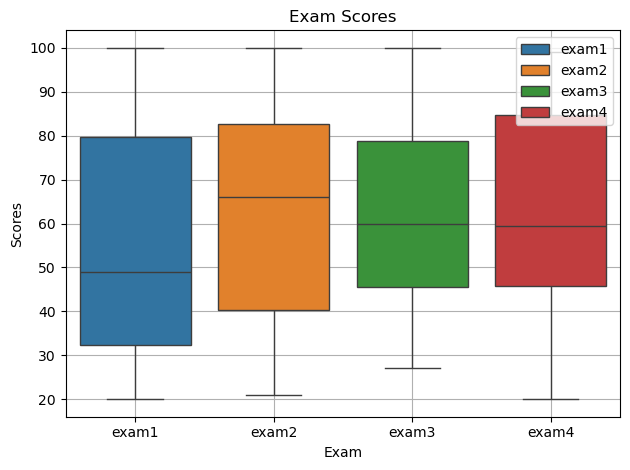

In [ ]:
def plot_data(data, title = '', xlabel = '', ylabel = ''):
    sns.boxplot(data = data)
    plt.title(title if title else f'Exam Scores')
    plt.xlabel(xlabel if xlabel else f'Exam')
    plt.ylabel(ylabel if ylabel else f'Scores')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_data(df)

8.2 Chi-Square Tests

In [11]:
# 2x2 table
gilbert_df = np.array([[40, 217], [34, 1350]])
chi, p_val, dof, ex= chi2_contingency(gilbert_df, correction = False)

# p < alpha: reject null hyp; support alt hyp
# p >= alpha: fail to reject null hyp; do not support alt hyp

print(f''' Chi-Squared contigency test:
            chi:     {chi:.2f}
            p-value: {p_val:.4f}
            dof:     {dof}
        ''')

 Chi-Squared contigency test:
            chi:     86.48
            p-value: 0.0000
            dof:     1
        


8.3 Chi-Squared Tests for Homogeneity and Independence
- Null hyp: Two variables are independent
- Alt Hyp: Two variables are not independent
- X^2 = Summation( (observed count - expected count) ^2 / (expected count) )

In [13]:
# df from module example
parole_df = np.array([[405, 1422], [240, 470], [151, 275]])
chi, p_val, dof, ex = chi2_contingency(parole_df, correction = False)

# p_val < alpha: reject the null hyp; support alt hyp
# p_val > alpha: fail to reject null hyp; do not support alt hyp

print(f''' Chi-Squared contingency test:
            chi:     {chi:.2f}
            p-value: {p_val:.4f}
            dof:     {dof}
        ''')

 Chi-Squared contingency test:
            chi:     53.88
            p-value: 0.0000
            dof:     2
        


Homogeniety
- alt hyp: At least one of the probability statements is false

Accept or Reject hyp:
- p < null hyp: reject the null hyp; support the alt hyp
- p >= null hyp: fail to reject the null hyp; do not support the alt hyp